<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

# Шлях до файлу на Google Drive
path = '/content/drive/My Drive/Colab Notebooks/HW_6/data/data_2d.csv'
path1 = '/content/drive/My Drive/Colab Notebooks/HW_6/data/mnist.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df_data_2d = pd.read_csv(path)

df_data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [109]:
df_data_2d.shape

(199, 3)

In [110]:
df_data_2d.dtypes

0.000000000000000000e+00     float64
-7.687164597386728637e-01    float64
4.608603078297135447e-01     float64
dtype: object

In [111]:
df_data_2d.isnull().sum()

0.000000000000000000e+00     0
-7.687164597386728637e-01    0
4.608603078297135447e-01     0
dtype: int64

In [112]:
X_data_2d = df_data_2d.values

data_2d = []

clusters_data_2d = 10

for k in range(1, clusters_data_2d + 1):
    kmeans_data_2d = KMeans(n_clusters=k, n_init=10, random_state=50)
    kmeans_data_2d.fit(X_data_2d)
    average_distance = (sum(np.min(pairwise_distances(X_data_2d, kmeans_data_2d.cluster_centers_, metric='euclidean'), axis=1)) / X_data_2d.shape[0])
    data_2d.append(average_distance)
    #display(data_2d)

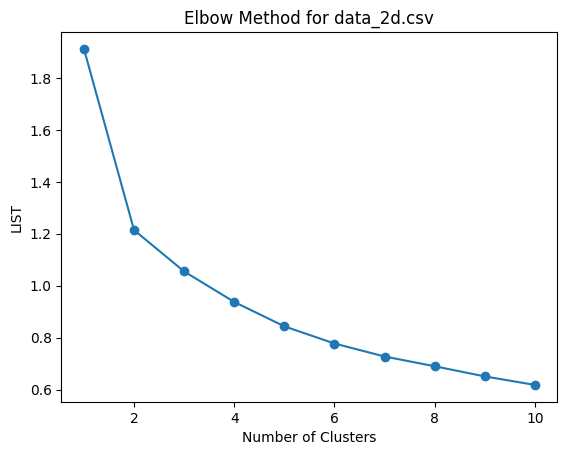

In [113]:
# Візуалізація ліктя для data_2d.csv
plt.plot(range(1, clusters_data_2d + 1), data_2d, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('LIST')
plt.title('Elbow Method for data_2d.csv')
plt.show()


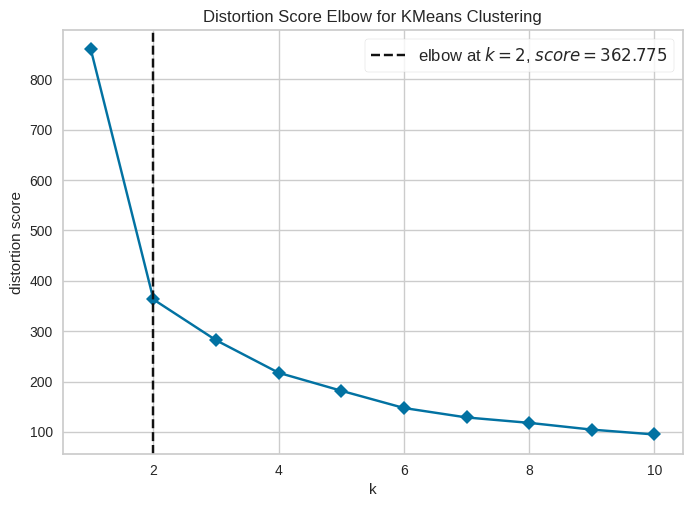

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Створення моделі KMeans
model = KMeans(random_state=0, n_init=10)

# Створення фігури і осей для візуалізації
fig, ax = plt.subplots()

# Створення KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 11), ax=ax, timings=False)

# Побудова графіку
visualizer.fit(X_data_2d)
visualizer.show()


**ВИСНОВКИ**

Проаналізувавши дані файлу data_2d.csv, котрий вміщає 2 ознаки можемо сказати, що в процесі кластеризації було виявлено оптимальна доцільність кластерів  - 2 так як після другого кластера ознака не змінюється на стільки щоб це впливало на результат.

Крім цього додатково застосувавши метод yellowbrick ми чітко бачимо розрахункову модель ефективності кластера, яка також вказує на кластер 2 при значенні 362,775.

In [114]:
df_mnist = pd.read_csv(path1)

df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df_mnist.shape

(499, 785)

In [116]:
df_mnist.dtypes

7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype: object

In [117]:
df_mnist.isnull().sum()

7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64

In [118]:
X_df_mnist = df_mnist.values

df_mnist = []

clusters_df_mnist = 10

for k in range(1, clusters_df_mnist + 1):
    kmeans_df_mnist = KMeans(n_clusters=k, n_init=10, random_state=50)
    kmeans_df_mnist.fit(X_df_mnist)
    average_distance = (sum(np.min(pairwise_distances(X_df_mnist, kmeans_df_mnist.cluster_centers_, metric='euclidean'), axis=1)) / X_df_mnist.shape[0])
    df_mnist.append(average_distance)
    #display(df_mnist)

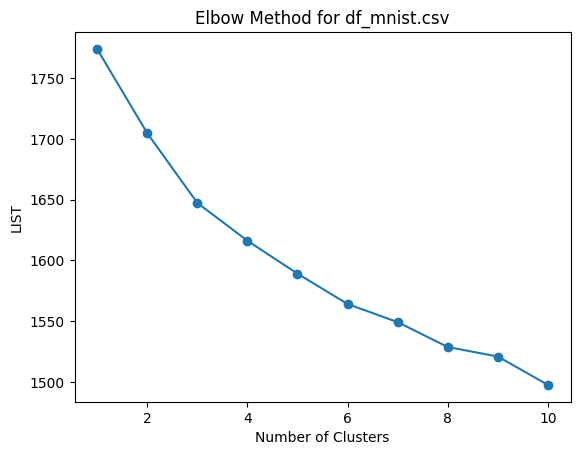

In [119]:
# Візуалізація ліктя для data_2d.csv
plt.plot(range(1, clusters_df_mnist + 1), df_mnist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('LIST')
plt.title('Elbow Method for df_mnist.csv')
plt.show()

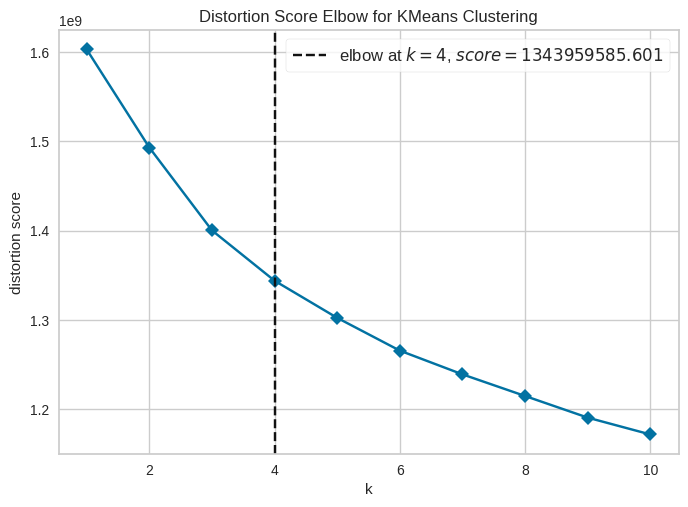

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Створення моделі KMeans
model = KMeans(random_state=0, n_init=10)

# Створення фігури і осей для візуалізації
fig, ax = plt.subplots()

# Створення KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 11), ax=ax, timings=False)

# Побудова графіку
visualizer.fit(X_df_mnist)
visualizer.show()


**ВИСНОВКИ:**

Проаналізувавши дані файлу mnist.csv, котрий вміщає 5 рядків та 785 колонок ознак можемо сказати, що в процесі кластеризації візуально було виявлено оптимальна доцільність кластерів - 3 так як після третього кластера ознака не змінюється на стільки щоб це впливало на результат.

Але при застосуванні методу yellowbrick ми бачимо розрахункову модель ефективності кластера, яка вказує на кластер 4 з обгрунтуванням конкретного значення. Це вказує на потребу додаткового дослідження значень даних при умові що дані значення мають життєво важливі наслідки. При умові що наслідки даної моделі не є принциповими на основі кластера 3 чи 4 я за основу прийняв би кластер 3.